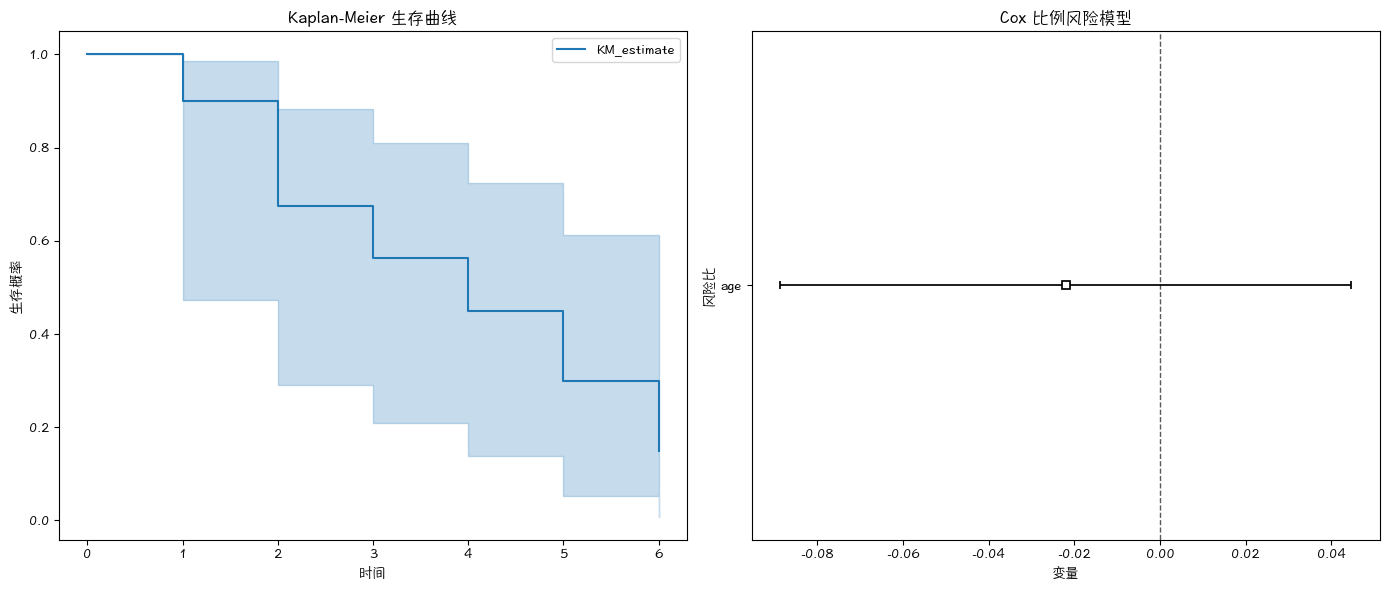

In [9]:
import pandas as pd
import numpy as np
from lifelines import KaplanMeierFitter, CoxPHFitter
import matplotlib.pyplot as plt

from matplotlib import rcParams
from matplotlib import font_manager


# 设置苹果系统的中文字体
rcParams['font.family'] = ['Hannotate SC','Hiragino Sans GB']
rcParams['axes.unicode_minus'] = False  # 解决坐标轴负号显示问题


# 创建示例数据
data = {
    'time': [5, 6, 6, 2, 4, 4, 3, 1, 1, 2],
    'event': [1, 0, 1, 1, 1, 0, 1, 0, 1, 1],
    'age': [50, 60, 45, 70, 30, 55, 65, 25, 35, 40]
}
df = pd.DataFrame(data)

# Kaplan-Meier估计
kmf = KaplanMeierFitter()
kmf.fit(durations=df['time'], event_observed=df['event'])

# Cox比例风险模型
cph = CoxPHFitter()
cph.fit(df, duration_col='time', event_col='event')

# 创建图形
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# 绘制Kaplan-Meier生存曲线
kmf.plot_survival_function(ax=ax[0])
ax[0].set_title('Kaplan-Meier 生存曲线')
ax[0].set_xlabel('时间')
ax[0].set_ylabel('生存概率')

# 绘制Cox比例风险模型
cph.plot(ax=ax[1])
ax[1].set_title('Cox 比例风险模型')
ax[1].set_xlabel('变量')
ax[1].set_ylabel('风险比')

plt.tight_layout()
plt.savefig('survial-analysis.svg', format='svg', transparent=True)
plt.show()
